In [ ]:
# https://drive.google.com/file/d/1nKjUFDtcWfuyeIGM65-7TD9ZYjRxDb4d/view?usp=sharing

# https://drive.google.com/file/d/1MCzB42vS9mmUTwl7ddIGKd-R0vluWN8q/view?usp=sharing
! gdown 1nKjUFDtcWfuyeIGM65-7TD9ZYjRxDb4d

Downloading...
From: https://drive.google.com/uc?id=1nKjUFDtcWfuyeIGM65-7TD9ZYjRxDb4d
To: /content/dataset.csv
100% 12.8M/12.8M [00:00<00:00, 27.3MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# for drawing
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
age=pd.read_csv('./dataset.csv')
age


,Birth year,Age of death,Birth century,Occupation_encoded,Country_encoded,Gender_endcoded
0,1952,49.0,20,1,56,1
1,1809,56.0,19,23,59,1
2,1888,88.0,19,1,16,1
3,1840,86.0,19,1,16,1
4,1935,42.0,20,1,59,1
...,...,...,...,...,...,...
627108,1901,64.0,20,31,31,2
627109,1857,67.0,19,7,54,1
627110,1920,24.0,20,17,19,2
627111,1887,28.0,19,1,56,1


In [ ]:
age = age.dropna()
age


,Birth year,Age of death,Birth century,Occupation_encoded,Country_encoded,Gender_endcoded
0,1952,49.0,20,1,56,1
1,1809,56.0,19,23,59,1
2,1888,88.0,19,1,16,1
3,1840,86.0,19,1,16,1
4,1935,42.0,20,1,59,1
...,...,...,...,...,...,...
627108,1901,64.0,20,31,31,2
627109,1857,67.0,19,7,54,1
627110,1920,24.0,20,17,19,2
627111,1887,28.0,19,1,56,1


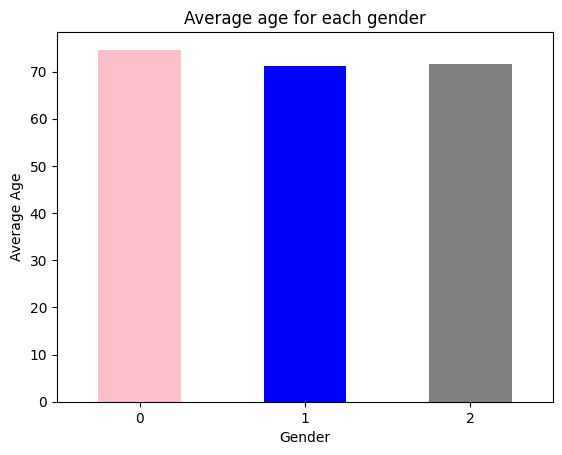

In [ ]:
import pandas as pd



gender_0_data = age[age['Gender_endcoded'] == 0]

gender_1_data = age[age['Gender_endcoded'] == 1]
gender_2_data = age[age['Gender_endcoded'] == 2]

random_gender_0 = gender_0_data.sample(n=10000,random_state = 33)
random_gender_1 = gender_1_data.sample(n=10000,random_state = 33)
random_gender_2 = gender_2_data.sample(n=10000,random_state = 33)

random_sample = pd.concat([random_gender_0, random_gender_1,random_gender_2])


mean_ages = []
genders = list(random_sample['Gender_endcoded'].unique())
age_gender =  random_sample.groupby('Gender_endcoded')['Age of death'].mean()

age_gender.plot(kind='bar',color=['pink','blue','gray'])
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average age for each gender')
plt.xticks(rotation=0) # make text vertical
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
selected_features = ["Birth year","Birth century","Occupation_encoded","Country_encoded","Gender_endcoded"]


X = age[selected_features]
y = age["Age of death"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)





Mean Squared Error: 222.5140783078957
Root Mean Squared Error: 14.916905788664607


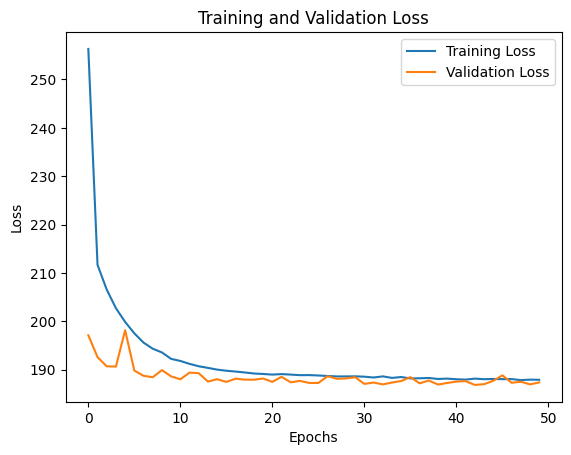

4215/4215 [==============================] - 8s 2ms/step
Mean Squared Error: 186.7321967395107
Root Mean Squared Error: 13.664998965953517


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are defined elsewhere

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define input layer
inputs = tf.keras.Input(shape=(X_train_scaled.shape[1],))

# Hidden layers
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

# Skip connection
concat_layer = tf.keras.layers.concatenate([inputs, x])
# Additional hidden layer
x = tf.keras.layers.Dense(64, activation='relu')(concat_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Output layer
outputs = tf.keras.layers.Dense(1)(x)

# Define the optimizer with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


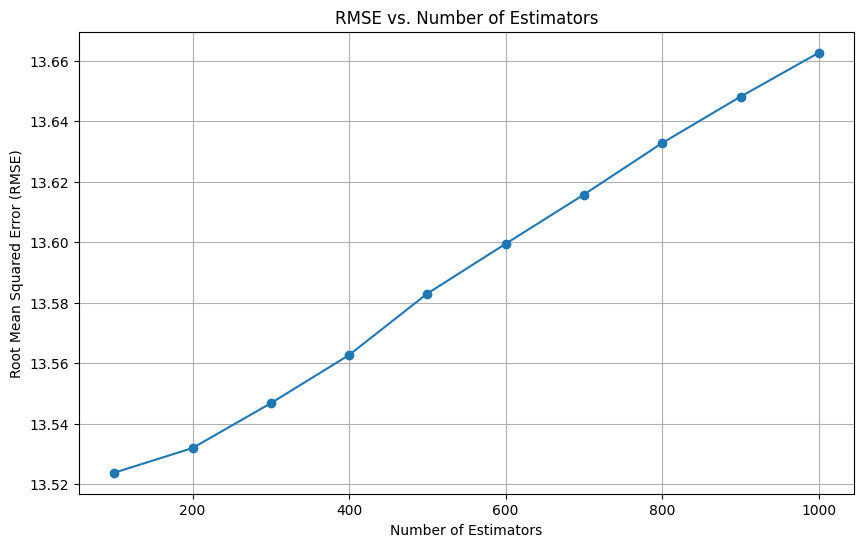

In [ ]:
dimport numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have installed XGBoost, if not, you can install it using pip:
# pip install xgboost

# Define a range of values for n_estimators
n_estimators_range = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Initialize lists to store the RMSE values
rmse_values = []

# Train XGBoost models for each value of n_estimators
for n_estimators in n_estimators_range:
    model = XGBRegressor(
        n_estimators=n_estimators,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_values.append(rmse)

# Plot the RMSE values against the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, rmse_values, marker='o', linestyle='-')
plt.title('RMSE vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()
